<a href="https://colab.research.google.com/github/entangelk/study_data_analytics/blob/main/docs/visualization/visualization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치 및 시각화

In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 런타임메뉴에서 리스타트 세션 해줘야함

- 한글 폰트 설치가 끝났으면 리스타트 잊지말라구!

In [1]:
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
# 유니코드 마이너스 사용 설정
plt.rcParams['axes.unicode_minus'] = False

## load dataset file

In [6]:
df_SSL = pd.read_csv('SpineSurgeryList.csv')
df_SSL[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


## 분석 방식
- 목적 : 병원 회전율 높이 방법
- 방법 : 입원/퇴원 간 추이

In [7]:
# 확인 대상 컬럼
df_SSL.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [8]:
df_SSL['환자ID'].value_counts()[:5] # 내림차순 정렬

1PT       1
1259PT    1
1271PT    1
1270PT    1
1269PT    1
Name: 환자ID, dtype: int64

In [9]:
df_SSL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

### 필요 컬럼들만 추출

In [10]:
# df_SSL[['환자ID', '입원일자', '퇴원일자']].info()   # 추출한 컬럼들만 정보 확인
df_SSL_extracts = df_SSL[['환자ID', '입원일자', '퇴원일자']]   # 추출한 컬럼들만 정보 확인
df_SSL_extracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   환자ID    1894 non-null   object
 1   입원일자    1894 non-null   int64 
 2   퇴원일자    1894 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 44.5+ KB


### 분석 위한 변

In [11]:
df_SSL_extracts["입원일자_datetime"] = pd.to_datetime(df_SSL_extracts["입원일자"].astype(str))
df_SSL_extracts["퇴원일자_datetime"] = pd.to_datetime(df_SSL_extracts["퇴원일자"].astype(str))

<ipython-input-11-8ad2a4eba9e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts["입원일자_datetime"] = pd.to_datetime(df_SSL_extracts["입원일자"].astype(str))
<ipython-input-11-8ad2a4eba9e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts["퇴원일자_datetime"] = pd.to_datetime(df_SSL_extracts["퇴원일자"].astype(str))


In [12]:
# df_SSL_extracts[:2]
df_SSL_extracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   환자ID           1894 non-null   object        
 1   입원일자           1894 non-null   int64         
 2   퇴원일자           1894 non-null   int64         
 3   입원일자_datetime  1894 non-null   datetime64[ns]
 4   퇴원일자_datetime  1894 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 74.1+ KB


### 주차별 환자 입원/퇴원 추이 시각화와 분석

In [ ]:
df_SSL_extracts['입원일자_week'] = df_SSL_extracts['입원일자_datetime'].dt.week
df_SSL_extracts

In [ ]:
df_SSL_extracts_in_week = pd.pivot_table(data=df_SSL_extracts, index='입원일자_week', aggfunc=len)
df_SSL_extracts_in_week[:2]

,입원일자,입원일자_datetime,퇴원일자,퇴원일자_datetime,환자ID
입원일자_week,,,,,
1,88,88,88,88,88
2,53,53,53,53,53


In [ ]:
df_SSL_extracts_in_week['입원일자_week'] = df_SSL_extracts_in_week.index

<Axes: xlabel='입원일자_week', ylabel='환자ID'>

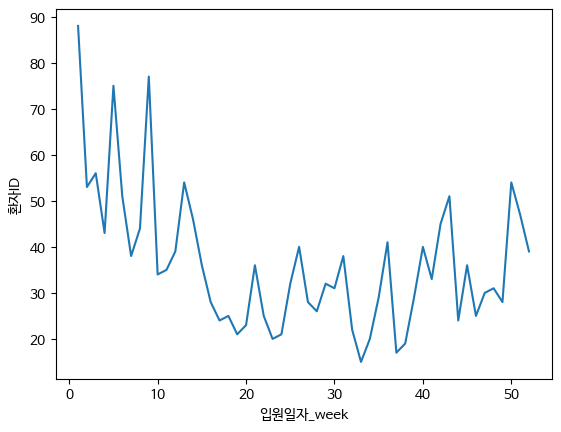

In [ ]:
import seaborn as sns
sns.lineplot(data=df_SSL_extracts_in_week, x='입원일자_week', y='환자ID')

### 요일별 환자 입원/퇴원 추치 시각화와 분석

In [13]:
df_SSL_extracts['입원일자_day_name'] = df_SSL_extracts['입원일자_datetime'].dt.day_name()
df_SSL_extracts['퇴원일자_day_name'] = df_SSL_extracts['퇴원일자_datetime'].dt.day_name()
df_SSL_extracts[:2]

<ipython-input-13-df131a02209d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['입원일자_day_name'] = df_SSL_extracts['입원일자_datetime'].dt.day_name()
<ipython-input-13-df131a02209d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['퇴원일자_day_name'] = df_SSL_extracts['퇴원일자_datetime'].dt.day_name()


,환자ID,입원일자,퇴원일자,입원일자_datetime,퇴원일자_datetime,입원일자_day_name,퇴원일자_day_name
0,1PT,20190713,20190716,2019-07-13,2019-07-16,Saturday,Tuesday
1,2PT,20190715,20190716,2019-07-15,2019-07-16,Monday,Tuesday


In [19]:
ex_pivot_name_id = pd.pivot_table(data = df_SSL_extracts[['입원일자_day_name','환자ID']], index='입원일자_day_name', aggfunc=len)

In [27]:
ex_pivot_nameout_id = pd.pivot_table(data = df_SSL_extracts[['퇴원일자_day_name','환자ID']], index='퇴원일자_day_name', aggfunc=len)

In [23]:
ex_index = ex_pivot_name_id.index.to_list()

<Axes: ylabel='환자ID'>

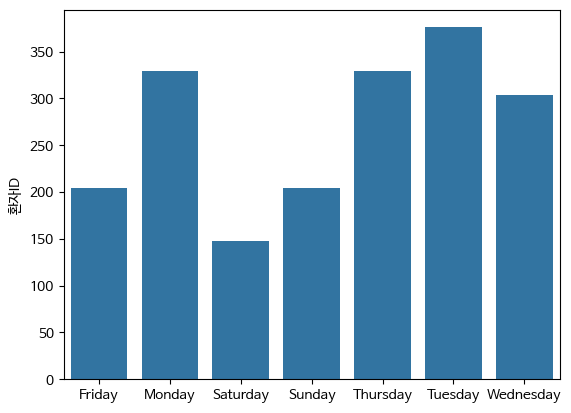

In [24]:
sns.barplot(data = ex_pivot_name_id, x=ex_index, y='환자ID')

<Axes: xlabel='퇴원일자_day_name', ylabel='환자ID'>

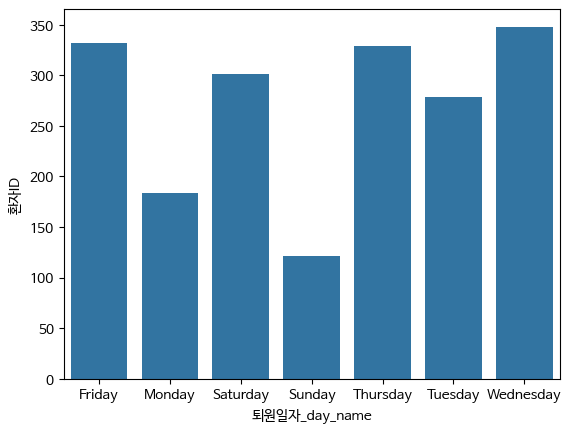

In [28]:
sns.barplot(data = ex_pivot_nameout_id, x='퇴원일자_day_name', y='환자ID')